**Вопрос 0**

Функции

Функция - обособленный участок кода,
который можно вызывать, обратившись к нему по имени,
которым он был назван (подпрограмма); объект,
принимающий аргументы и возвращающий значение.

Функции помогают избежать дублирования кода, улучшить
его структурированность и читаемость.


Параметры функции

● Функция может принимать более 1 параметра (а
может не принимать параметры вообще).

● Для всех параметров функций можно указывать
значения по-умолчанию, это дает возможность
вызвать функцию с меньшим числом
параметров.

In [25]:
def get_power(num, power=2):
    res = num ** power
    return res

get_power(5)

25

Области видимости в Python

Область видимости (scope) определяет контекст объекта, в
рамках которого его можно использовать. 

Рассмотрим 3 типа области видимости:

● глобальная область видимости (global scope);

● локальная область видимости (local scope);

● нелокальная область видимости (nonlocal scope).

Глобальный контекст подразумевает, что переменная является
глобальной, она определена вне любой из функций и доступна
любой функции в программе.
В отличие от глобальных переменных локальная переменная
определяется внутри функции и доступна только из этой функции,
то есть имеет локальную область видимости.
Если Python не может найти нужную переменную в локальной
области видимости, то тогда (и только тогда) он будет искать ее в
области видимости уровня выше.

In [26]:
number = 5
power = 3

def get_power():
    number = 6
    power = 2
    return number ** power

print(number ** power)
print(get_power())

125
36


In [27]:
number = 5
power = 3

def get_power():
    power = 2
    return number ** power

print(number ** power)
print(get_power())

125
25


In [28]:
number = 5
power = 10

def get_power():
    number = 5
    power = 2
    some_number = 1 
    return number ** power

# будет ошибка, это пример
print(some_number)

NameError: name 'some_number' is not defined

Оператор global позволяет создать глобальную переменную в
локальном контексте.
Оператор nonlocal позволяет изменить переменную в области
видимости более высокого уровня (которая, в свою очередь,
является локальной областью видимости для других
переменных).

In [29]:
name = 'James'
def say_hi():
    global name
    name = 'Oleg'
    print('Hello', name)

say_hi()

print(name)

Hello Oleg
Oleg


In [30]:
def say_hi():
    name = 'Oleg'
    def get_name():
        nonlocal name
        name = input('Введите имя ')
        return name
    get_name()
    print('Hello', name)

say_hi()

Введите имя James
Hello James


In [1]:
countries_temperature = [
 ['Thailand', [75.2, 77, 78.8, 73.4, 68, 75.2, 77]],
 ['Germany', [57.2, 55.4, 59, 59, 53.6, 55.4, 57.2]],
 ['Russia', [35.6, 37.4, 39.2, 41, 42.8, 39.2, 35.6]],
 ['Poland', [50, 50, 53.6, 57.2, 55.4, 55.4, 51.8]],
]

Напишем функцию, которая принимает в качестве аргумента страну и возвращает средненедельную температуру в цельсиях.


In [3]:
def get_temp(data, country_arg):
    res = {}
    for country in data:
        if country[0] == country_arg:
            average_temp = 0
            for temperature in country[1]:
                average_temp += (temperature - 32) * 5 / 9
        res[country_arg] = round(average_temp/len(country[1]), 2)
    return res

print(get_temp(countries_temperature, 'Thailand'))

{'Thailand': 23.86}


In [1]:
students_list = [
    {"name": "Василий", "surname": "Теркин", "sex": "мужчина", "program_exp": True, "grade": [8, 8, 9, 10, 9], "exam": 9},
    {"name": "Мария", "surname": "Павлова", "sex": "женщина", "program_exp": True, "grade": [7, 8, 9, 7, 9], "exam": 8},
    {"name": "Ирина", "surname": "Андреева", "sex": "женщина", "program_exp": True, "grade": [10, 9, 8, 10, 10], "exam": 10},
    {"name": "Татьяна", "surname": "Сидорова", "sex": "женщина", "program_exp": True, "grade": [7, 8, 8, 9, 8],"exam": 8},
    {"name": "Иван", "surname": "Васильев", "sex": "мужчина", "program_exp": True, "grade": [9, 8, 9, 6, 9], "exam": 10},
    {"name": "Роман", "surname": "Золотарев", "sex": "мужчина", "program_exp": False, "grade": [8, 9, 9, 6, 9], "exam": 10}
]

In [2]:
def average_grades(students):
    sum_average_hw = 0
    sum_average_exam = 0
    for student in students:
        sum_average_hw += sum(student['grade'])/len(student['grade'])
        sum_average_exam += student['exam']
    print('Средняя оценка за ДЗ: ', round(sum_average_hw/len(students), 2))
    print('Средняя оценка за Экзамен: ', round(sum_average_exam/len(students), 2))  

average_grades(students_list)

Средняя оценка за ДЗ:  8.43
Средняя оценка за Экзамен:  9.17


In [7]:
def average_grades_by_exp(students, exp=True):
    sum_average_hw = 0
    sum_average_exam = 0
    student_counter = 0
    for student in students:
        if student['program_exp'] == exp:
            sum_average_hw += sum(student['grade'])/len(student['grade'])
            sum_average_exam += student['exam']   
            student_counter += 1
    if exp == True:
        print('Средняя оценка за ДЗ у студентов с опытом равна ', round(sum_average_hw/student_counter, 2))
        print('Средняя оценка за Экзамен у студентов с опытом равна ', round(sum_average_exam/student_counter, 2)) 
    else:
        print('Средняя оценка за ДЗ у студентов без опытом равна ', round(sum_average_hw/student_counter, 2))
        print('Средняя оценка за Экзамен у студентов без опытом равна ', round(sum_average_exam/student_counter, 2)) 

average_grades_by_exp(students_list, exp=True)
average_grades_by_exp(students_list, exp=False)

Средняя оценка за ДЗ у студентов с опытом равна  8.48
Средняя оценка за Экзамен у студентов с опытом равна  9.0
Средняя оценка за ДЗ у студентов без опытом равна  8.2
Средняя оценка за Экзамен у студентов без опытом равна  10.0


**Вопрос 1**

В Python переменные передаются по ссылке или по значению? Mutable и unmutable типы данных

К неизменяемым типам относят:
- integer, 
- float, 
- complex, 
- bool, 
- tuple, 
- str, 
- frozenset

При объявлении любой неизменяемой переменной объект с данным id больше нельзя менять. При операциях существующие объекты не меняются, а создаётся новый объект, с которым потом связывается существующее имя.

In [31]:
my_name = 'Oleg'
print('Тип - ', type(my_name))
print('Id - ', id(my_name))

Тип -  <class 'str'>
Id -  2446044367984


In [32]:
my_name[0] = 'o'

TypeError: 'str' object does not support item assignment

In [33]:
my_name.replace('O', 'o')
print(my_name)
print('Тип - ', type(my_name))
print('Id - ', id(my_name))

Oleg
Тип -  <class 'str'>
Id -  2446044367984


In [34]:
print(my_name.replace('O', 'o'))
print(id(my_name.replace('O', 'o')))

oleg
2446044368768


In [36]:
my_name = 'Oleg'
print(type(my_name))
print(id(my_name))

<class 'str'>
2446044367984


К изменяемым типам относят 
- list, 
- set, 
- dict.

При объявлении изменяемой переменной значение объекта с таким id менять можно.

In [37]:
my_list = [1, 2, 3, 4, 5]
print(type(my_list))
print(id(my_list))

<class 'list'>
2446035521160


In [38]:
my_list[0] = 10
print(my_list)
print(id(my_list))

[10, 2, 3, 4, 5]
2446035521160


In [39]:
my_list = [1, 2, 3, 4, 5]
print(type(my_list))
print(id(my_list))

<class 'list'>
2446045309448


In [40]:
my_list = ['John', 'James', 'Jane']
def change_list(some_list):
    some_list.append('Kate')

In [41]:
print(my_list)
print(id(my_list))

['John', 'James', 'Jane']
2446045251464


In [43]:
change_list(my_list)
print(my_list)
print(id(my_list))

['John', 'James', 'Jane', 'Kate']
2446045251464


In [44]:
my_tuple = ('John', 'James', 'Jane')
print(id(my_tuple))

2446037588728


In [45]:
def change_tuple(some_tuple):
    some_tuple = ('Kate')
    print(some_tuple)
    print(id(some_tuple))

In [46]:
change_tuple(my_tuple)
print(my_tuple)
print(id(my_tuple))

Kate
2446042333288
('John', 'James', 'Jane')
2446037588728


**Вопрос 2**

Выборки из DataFrame

In [9]:
import pandas as pd

In [11]:
df = pd.read_csv('/Users/aleksandr/Downloads/pyda/yob2017.txt', names=['Name', 'Sex', 'Quantity'])
df.head()

,Name,Sex,Quantity
0,Emma,F,19800
1,Olivia,F,18703
2,Ava,F,15958
3,Isabella,F,15180
4,Sophia,F,14883


Получить конкретный столбец датафреймможно при помощи *[ ]*. Полученный объект будет иметь тип *Series*.

In [47]:
print(df['Name'].head())
type(df['Name'])

0        Emma
1      Olivia
2         Ava
3    Isabella
4      Sophia
Name: Name, dtype: object


pandas.core.series.Series

Также для доступаа к столбу можно использовать "." Работает только в случаях, когда имя столбца не содержит пробельные символы.

In [48]:
df.Name.head()

0        Emma
1      Olivia
2         Ava
3    Isabella
4      Sophia
Name: Name, dtype: object

In [14]:
# тут будет ошибка т.к. siries одномерный массив

df['Name', 'Sex']

Если использовать *[[ ]]*, полученный объект сохранит
тип датафрейм. 

In [49]:
print(df[['Name']].head())
type(df[['Name']])

       Name
0      Emma
1    Olivia
2       Ava
3  Isabella
4    Sophia


pandas.core.frame.DataFrame

In [50]:
df[['Name', 'Sex']].head()

,Name,Sex
0,Emma,F
1,Olivia,F
2,Ava,F
3,Isabella,F
4,Sophia,F


Проиндексировав датафрейм можно получить
необходимую выборку “строк” (в данном случае с первой по
третью)

In [16]:
df[2:10:2]

,Name,Sex,Quantity
2,Ava,F,15958
4,Sophia,F,14883
6,Charlotte,F,12937
8,Evelyn,F,10712


Выборку из датафрейма по критерию сделать при помощи Series,
списка или массива с булевыми значениями

In [52]:
(df['Sex'] == 'F').head(10)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Sex, dtype: bool

In [53]:
df[df['Sex'] == 'M'].head()

,Name,Sex,Quantity
18375,Liam,M,18798
18376,Noah,M,18410
18377,William,M,14967
18378,James,M,14291
18379,Logan,M,14014


In [36]:
# Для работы с dataFrame необходимо побитовое сравнение (and, or и т.п. - не сработает!!!)

# https://wombat.org.ua/AByteOfPython/operators_and_expressions.html
# & Побитовое И
# | Побитовое ИЛИ
# ^ Побитовое ИСКЛЮЧИТЕЛЬНО ИЛИ
# ~ Побитовое НЕ

df[(df['Sex'] == 'F') | (df['Name'] == 'Michael')]
df[(df['Sex'] == 'M') & (df['Name'] == 'Michael')]

df[((df['Sex'] == 'M') & (df['Name'] == 'Michael')) | ((df['Sex'] == 'F') & (df['Name'] == 'Michael'))]

,Name,Sex,Quantity
4274,Michael,F,34
18386,Michael,M,12639


Доступ к строкам по индексу возможен несколькими способами:

● .loc - используется для доступа по строковой метке;

● .iloc - используется для доступа по числовому значению
(начиная от 0).

In [72]:
my_df = pd.DataFrame({
    'City': ['MSK', 'SPB', 'EKB', 'EKB'],
    'Temp': [-3, -5, -2, 5],
    'State': ['Cloudy', 'Clear', 'Snow', 'Snow']
})
my_df

,City,Temp,State
0,MSK,-3,Cloudy
1,SPB,-5,Clear
2,EKB,-2,Snow
3,EKB,5,Snow


In [73]:
my_df.set_index('City', inplace=True)

In [74]:
# используем loc для доступа по значению индекса
# my_df
my_df.loc['EKB']
# my_df.loc[['MSK', 'EKB']]

,Temp,State
City,,
EKB,-2,Snow
EKB,5,Snow


In [75]:
# используем iloc для доступа по номеру индекса
my_df.iloc[0]
my_df.iloc[0:2]

,Temp,State
City,,
MSK,-3,Cloudy
SPB,-5,Clear


**Вопрос 3** 

Как посчитать статистики только по четным годам/по кварталам.

In [55]:
from datetime import datetime
from matplotlib import pyplot as plt

Как посчитать статистики только по кварталам/годам/неделям?

In [54]:
ozone = pd.read_csv('/Users/aleksandr/Downloads/pyda/ozone_nyc.csv', parse_dates=['date'], index_col='date')
ozone.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


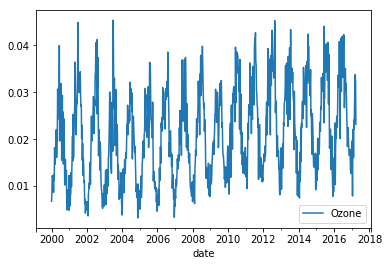

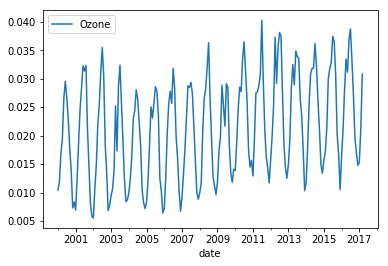

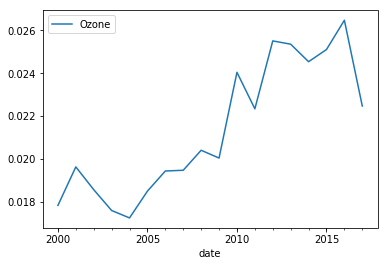

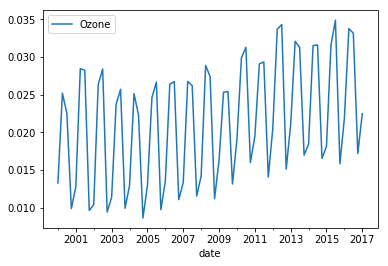

In [78]:
# Используем метод resample, чтобы сгруппировать дни по неделям и посчитать средние
ozone.resample('W').agg['mean', 'max'].plot()
plt.show()

# Используем метод resample, чтобы сгруппировать дни по месяцам и посчитать средние
ozone.resample('M').mean().plot()
plt.show()

# Используем метод resample, чтобы сгруппировать дни по годам и посчитать средние
ozone.resample('A').mean().plot()
plt.show()

# Используем метод resample, чтобы сгруппировать дни по кварталам и посчитать средние
ozone.resample('Q').mean().plot()
plt.show()

In [56]:
ozone.resample('W').agg(['mean', 'max']).head()

Ozone          
                mean       max
date                          
2000-01-02  0.006759  0.009486
2000-01-09  0.008237  0.013754
2000-01-16  0.012210  0.019417
2000-01-23  0.012002  0.019178
2000-01-30  0.011995  0.018035

In [82]:
# Считамем метрики только для четных лет (либо по любому другому критерию)
pd.date_range('2000', periods=18, freq='2Y')

DatetimeIndex(['2000-12-31', '2002-12-31', '2004-12-31', '2006-12-31',
               '2008-12-31', '2010-12-31', '2012-12-31', '2014-12-31',
               '2016-12-31', '2018-12-31', '2020-12-31', '2022-12-31',
               '2024-12-31', '2026-12-31', '2028-12-31', '2030-12-31',
               '2032-12-31', '2034-12-31'],
              dtype='datetime64[ns]', freq='2A-DEC')

In [83]:
ozone.index.year.isin(pd.date_range('2000', periods=18, freq='2Y').year)

array([ True,  True,  True, ..., False, False, False])

In [57]:
ozone[ozone.index.year.isin(pd.date_range('2000', periods=18, freq='2Y').year)].head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [85]:
ozone[ozone.index.year.isin(pd.date_range('2000', periods=18, freq='2Y').year)].index.year.unique()

Int64Index([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016], dtype='int64', name='date')

**Вопрос 4** 

Меняем четные и нечетные строки в df

In [37]:
my_df = pd.DataFrame({
    'City': ['MSK', 'SPB', 'EKB', 'NVG'],
    'Temp': [-3, -5, -2, 1],
    'State': ['Cloudy', 'Clear', 'Snow', 'Snow']
})
my_df

,City,Temp,State
0,MSK,-3,Cloudy
1,SPB,-5,Clear
2,EKB,-2,Snow
3,NVG,1,Snow


In [38]:
even_indexes = list(my_df[my_df.index % 2 == 0].index)
even_indexes

[0, 2]

In [39]:
odd_indexes = list(my_df[my_df.index % 2 == 1].index)
odd_indexes

[1, 3]

In [40]:
res = list(zip(odd_indexes, even_indexes))
res

[(1, 0), (3, 2)]

In [41]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [42]:
my_df.index = flatten(res)
my_df

,City,Temp,State
1,MSK,-3,Cloudy
0,SPB,-5,Clear
3,EKB,-2,Snow
2,NVG,1,Snow


In [43]:
my_df.sort_index()

,City,Temp,State
0,SPB,-5,Clear
1,MSK,-3,Cloudy
2,NVG,1,Snow
3,EKB,-2,Snow


**Вопрос 5** 

Как показать распределение признака в разрезе двух показателей?

In [93]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [94]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [95]:
df.salary.value_counts(normalize=True)*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

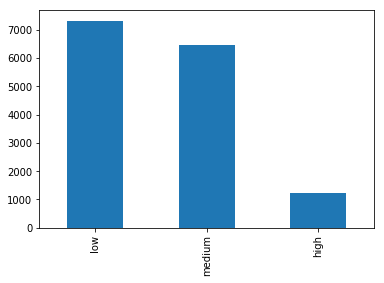

In [96]:
df.salary.value_counts().plot(kind='bar')

In [98]:
salary_by_dep = df.groupby(['sales', 'salary']).count()
salary_by_dep.head(9)

satisfaction_level  last_evaluation  number_project  \
sales      salary                                                        
IT         high                    83               83              83   
           low                    609              609             609   
           medium                 535              535             535   
RandD      high                    51               51              51   
           low                    364              364             364   
           medium                 372              372             372   
accounting high                    74               74              74   
           low                    358              358             358   
           medium                 335              335             335   

                   average_montly_hours  time_spend_company  Work_accident  \
sales      salary                                                            
IT         high                      83                  83             83   
           low                      609                 609            609   
           medium                   535                 535            535   
RandD      high                      51                  51             51   
           low                      364                 364            364   
           medium                   372                 372            372   
accounting high                      74                  74             74   
           low                      358                 358            358   
           medium                   335                 335            335   

                   left  promotion_last_5years  
sales      salary                               
IT         high      83                     83  
           low      609                    609  
           medium   535                    535  
RandD      high      51                     51  
           low      364                    364  
           medium   372                    372  
accounting high      74                     74  
           low      358                    358  
           medium   335                    335

In [99]:
# salary_by_dep = df.groupby(['sales', 'salary']).count()[['left']].rename(columns={"left":"count_by_salary"})
salary_by_dep = df.groupby(['sales', 'salary']).count()[['left']].rename(columns={"left":"count_by_salary"}).reindex(level=1, index = ['high', 'medium', 'low'])
salary_by_dep.head(9)

count_by_salary
sales      salary                 
IT         high                 83
           medium              535
           low                 609
RandD      high                 51
           medium              372
           low                 364
accounting high                 74
           medium              335
           low                 358

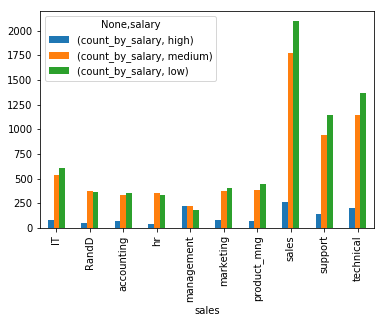

In [110]:
# salary_by_dep.unstack('salary')
salary_by_dep.unstack('salary').plot(kind='bar')

**Вопрос 5** 

Что делать, если сложные структуры в ячейках датафрейма распознаются, как строки?

In [100]:
df = pd.read_csv('/Users/aleksandr/Downloads/pyda/tmdb_5000_movies.csv')

In [101]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [102]:
df.genres.head()

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [74]:
for row in df.genres:
    for el in row:
        print(type(el))

# [output]: <class 'str'>

In [103]:
import ast

In [104]:
df.genres = df.genres.map(ast.literal_eval)

In [106]:
for row in df.genres:
    for el in row:
        print(el)

# [output]: 
#     {'id': 28, 'name': 'Action'}
#     {'id': 12, 'name': 'Adventure'}
#     {'id': 14, 'name': 'Fantasy'}
#     {'id': 878, 'name': 'Science Fiction'}
#     {'id': 12, 'name': 'Adventure'}
#     {'id': 14, 'name': 'Fantasy'}
#     {'id': 28, 'name': 'Action'}
#     {'id': 28, 'name': 'Action'}

**Вопрос 6** 

Мультииндекс

In [121]:
sales = pd.read_csv('sales.csv')
sales['state'] = ['CA', 'NYC', 'TX', 'CA', 'NYC', 'TX']
sales['month'] = ['Jan', 'Jan', 'Feb', 'Feb', 'Mar', 'Mar']
sales

,month,eggs,salt,spam,state
0,Jan,47,12.0,17,CA
1,Jan,110,50.0,31,NYC
2,Feb,221,89.0,72,TX
3,Feb,77,87.0,20,CA
4,Mar,132,NaN,52,NYC
5,Mar,205,60.0,55,TX


In [122]:
sales.set_index(['state', 'month'], inplace=True)
sales

,,eggs,salt,spam
state,month,,,
CA,Jan,47,12.0,17
NYC,Jan,110,50.0,31
TX,Feb,221,89.0,72
CA,Feb,77,87.0,20
NYC,Mar,132,NaN,52
TX,Mar,205,60.0,55


In [123]:
sales.index

MultiIndex(levels=[['CA', 'NYC', 'TX'], ['Feb', 'Jan', 'Mar']],
           labels=[[0, 1, 2, 0, 1, 2], [1, 1, 0, 0, 2, 2]],
           names=['state', 'month'])

In [125]:
# группируем индекс при помощи сортировки
sales.sort_index(inplace=True)
sales

eggs  salt  spam
state month                  
CA    Feb      77  87.0    20
      Jan      47  12.0    17
NYC   Jan     110  50.0    31
      Mar     132   NaN    52
TX    Feb     221  89.0    72
      Mar     205  60.0    55

In [127]:
# Получаем значения индекса нужного уровня
sales.index.get_level_values(1)

Index(['Feb', 'Jan', 'Jan', 'Mar', 'Feb', 'Mar'], dtype='object', name='month')

In [129]:
# делаем выборки на основе индекса
# sales.loc['TX']
sales.loc['CA':'NYC']

eggs  salt  spam
state month                  
CA    Feb      77  87.0    20
      Jan      47  12.0    17
NYC   Jan     110  50.0    31
      Mar     132   NaN    52

In [130]:
sales.loc[['CA','TX']]

eggs  salt  spam
state month                  
CA    Feb      77  87.0    20
      Jan      47  12.0    17
TX    Feb     221  89.0    72
      Mar     205  60.0    55

In [131]:
sales.loc[['NYC','TX'], 'Jan', :]

,,eggs,salt,spam
state,month,,,
NYC,Jan,110,50.0,31


In [132]:
sales.loc[(['CA', 'TX'], 'Feb'), :]

,,eggs,salt,spam
state,month,,,
CA,Feb,77,87.0,20
TX,Feb,221,89.0,72


,,eggs,salt,spam
state,month,,,
CA,Feb,77,87.0,20
TX,Feb,221,89.0,72


In [134]:
# добавляем нужный столбец
sales.loc[(['CA', 'TX'], 'Feb'), ('spam')]

state  month
CA     Feb      20
TX     Feb      72
Name: spam, dtype: int64

**Вопрос 7** 

Методы .apply() и .map(), .applymap()

Метод .apply(func) позволяет применить функцию ко всем
строкам/столбцам датафрейма, не применяя цикл (отрабатывает
намного быстрее).
В качестве аргумента принимает встроенную или написанную
функцию (без скобок).
Метод applymap позволяет применить функцию ко всем элементам датафрейма.
Метод .map() позволяет применить функцию к Series, работает
аналогично applymap().

In [113]:
df = pd.read_csv('yob2017.txt', names=['Name', 'Gender', 'Quantity'])

In [114]:
df.head()

,Name,Gender,Quantity
0,Emma,F,19800
1,Olivia,F,18703
2,Ava,F,15958
3,Isabella,F,15180
4,Sophia,F,14883


In [115]:
df['Name_Length'] = df[['Name']].applymap(len)
df.head()

,Name,Gender,Quantity,Name_Length
0,Emma,F,19800,4
1,Olivia,F,18703,6
2,Ava,F,15958,3
3,Isabella,F,15180,8
4,Sophia,F,14883,6


In [117]:
# Тоже самое что и выше

# df['Name Length'] = df_res.apply(lambda x: len(x['Name']), axis=1)
# df

In [111]:
sales = pd.read_csv('sales.csv').drop('month', axis=1)
sales

,eggs,salt,spam
0,47,12.0,17
1,110,50.0,31
2,221,89.0,72
3,77,87.0,20
4,132,NaN,52
5,205,60.0,55


In [139]:
sales.apply(max)

eggs    221.0
salt     89.0
spam     72.0
dtype: float64

In [140]:
sales.apply(max, axis=0)

eggs    221.0
salt     89.0
spam     72.0
dtype: float64

In [141]:
sales.apply(max, axis=1)

0     47.0
1    110.0
2    221.0
3     87.0
4    132.0
5    205.0
dtype: float64

In [148]:
def good_sales(x):
    if x['spam'] > 50 and x['eggs'] > 50:
        return True
    else:
        return False

In [ ]:
# тоже самое что и def выше

# sales['good_sales'] = sales.apply(lambda x: True if x['salt']>50 and x['eggs']>50 else False, axis=1)
# sales

In [149]:
sales['good_sales'] = sales.apply(good_sales, axis=1)
sales

,eggs,salt,spam,good_sales
0,47,12.0,17,False
1,110,50.0,31,False
2,221,89.0,72,True
3,77,87.0,20,False
4,132,NaN,52,True
5,205,60.0,55,True


**Вопрос 8** 

Классы. Что такое __init/__? Что такое self?

In [150]:
import requests
class Rate:
    def __init__(self, format='value', diff=False):
        self.format = format
        self.diff = diff
    
    def exchange_rates(self):
        """
        Возвращает ответ сервиса с информацией о валютах в виде:
        
        {
            'AMD': {
                'CharCode': 'AMD',
                'ID': 'R01060',
                'Name': 'Армянских драмов',
                'Nominal': 100,
                'NumCode': '051',
                'Previous': 14.103,
                'Value': 14.0879
                },
            ...
        }
        """
        r = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')
        return r.json()['Valute']
    
    def make_format(self, currency):
        """
        Возвращает информацию о валюте currency в двух вариантах:
        - полная информация о валюте при self.format = 'full':
        Rate('full').make_format('EUR')
        {
            'CharCode': 'EUR',
            'ID': 'R01239',
            'Name': 'Евро',
            'Nominal': 1,
            'NumCode': '978',
            'Previous': 79.6765,
            'Value': 79.4966
        }
        
        Rate('value').make_format('EUR')
        79.4966
        """
        response = self.exchange_rates()
        
        if currency in response:
            if self.format == 'full':
                return response[currency]
            if self.format == 'value':
                if  self.diff == True:
                    return round(response[currency]['Value'] - response[currency]['Previous'], 2)
                else:
                    return response[currency]['Value']
            if self.format == 'name':
                return response[currency]['Name']
            if self.format == 'name':
                return response[currency]['Name']
        return 'Error'
    
    def eur(self):
        """Возвращает курс евро на сегодня в формате self.format"""
        return self.make_format('EUR')
    
    def usd(self):
        """Возвращает курс доллара на сегодня в формате self.format"""
        return self.make_format('USD')

Rate('name').eur()

In [151]:
Rate().eur()

72.6993

Класс описывает пользовательский тип данных, на основе которого в программе создаются однородные объекты. Как правило, они могут включать в себя некие свойства (переменные) и методы (функции), позволяющие реализовать их текущее состояние, а также поведение.

In [152]:
print(type(1))

<class 'int'>


Создание класса в Python начинается с инструкции class. Вот так будет выглядеть минимальный класс.

In [153]:
class Rectangle:
    pass

In [154]:
figure_1 = Rectangle()
print(type(figure_1))

<class '__main__.Rectangle'>


Класс может содержать атрибуты и методы. Ниже представлен класс, содержащий атрибуты color (цвет), width (ширина), height (высота).

In [155]:
class Rectangle:
    color = 'red'
    width = 75
    height = 50

In [159]:
figure_1 = Rectangle()
# figure_1.height
figure_2 = Rectangle()
figure_1.width

75

Метод – это функция находящаяся внутри класса, выполняющая определенную работу, которая, чаще всего, предполагает доступ к атрибутам созданного объекта. Для того, чтобы метод в классе знал, с каким объектом он работает (это нужно для того, чтобы получить доступ к атрибутам), первым аргументом ему следует передать параметр self, через который он может получить доступ к своим данным. Помещать его нужно в каждую функцию чтобы иметь возможность вызвать ее на текущем объекте. 

In [160]:
class Rectangle:
    color = 'red'
    width = 50
    height = 100
    def square(self):
        return self.width * self.height

In [161]:
figure_1 = Rectangle()
figure_1.square()

5000

In [162]:
figure_2 = Rectangle()
figure_2.color = 'green'
figure_2.color

'green'

Конструктор класса позволяет задать определенные параметры объекта при его создании. Таким образом появляется возможность создавать объекты с уже заранее заданными атрибутами. Конструктором класса является метод:

In [163]:
class Rectangle:
    def __init__(self, color='green', width=50, height=100):
        self.color = color
        self.width = width
        self.height = height

    def square(self):
        return self.width * self.height

In [164]:
figure_3 = Rectangle('yellow', 100, 120)
figure_3.color

'yellow'

In [166]:
class Square(Rectangle):
    def __init__(self, color='purple', width=50, height=50):
        self.color = color
        self.width = width
        self.height = height

In [168]:
square_1 = Square()
square_1.square()

2500

In [ ]:
pass